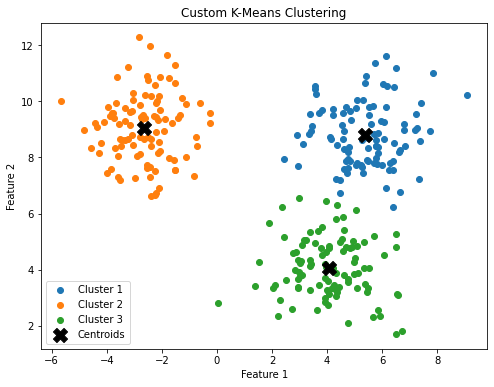

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate random 2D data (blobs)
def generate_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42):
    np.random.seed(random_state)
    X = []
    for i in range(centers):
        center = np.random.uniform(-10, 10, 2)
        points = center + np.random.randn(n_samples // centers, 2) * cluster_std
        X.append(points)
    X = np.vstack(X)
    return X

# Euclidean distance
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# Custom K-Means implementation
def kmeans(X, k=3, max_iters=100, tol=1e-4):
    # Randomly initialize centroids
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for iteration in range(max_iters):
        # Step 1: Assign points to nearest centroid
        labels = np.array([np.argmin([euclidean_distance(x, c) for c in centroids]) for x in X])
        
        # Step 2: Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    
    return labels, centroids

# Generate data
X = generate_blobs(n_samples=300, centers=3, cluster_std=1.2)

# Apply K-Means
k = 3
labels, centroids = kmeans(X, k=k)

# Plot results
plt.figure(figsize=(8,6))
for i in range(k):
    plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')
plt.title('Custom K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


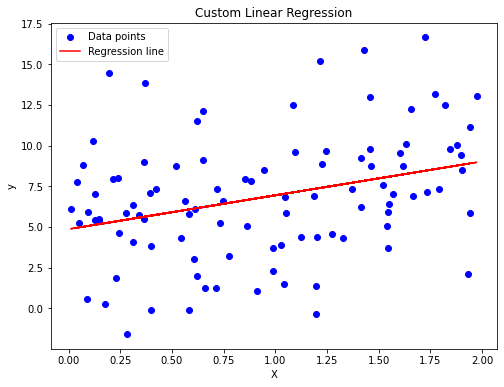

Weights: 2.08, Bias: 4.86


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for linear regression
def generate_data(n_samples=100, noise=5, random_state=42):
    np.random.seed(random_state)
    X = 2 * np.random.rand(n_samples, 1)
    y = 4 + 3 * X + np.random.randn(n_samples, 1) * noise
    return X, y

# Linear Regression using Gradient Descent
class LinearRegressionGD:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Generate data
X, y = generate_data(n_samples=100, noise=4)

# Train custom Linear Regression
regressor = LinearRegressionGD(lr=0.05, n_iters=1000)
regressor.fit(X, y)
y_pred = regressor.predict(X)

# Plot results
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title('Custom Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print learned parameters
print(f"Weights: {regressor.weights.flatten()[0]:.2f}, Bias: {regressor.bias:.2f}")


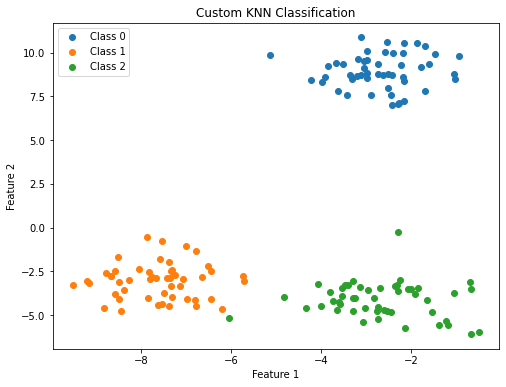

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Generate a simple 2D dataset
def generate_blobs(n_samples=150, centers=3, cluster_std=1.0, random_state=42):
    np.random.seed(random_state)
    X, y = [], []
    for i in range(centers):
        center = np.random.uniform(-10, 10, 2)
        points = center + np.random.randn(n_samples // centers, 2) * cluster_std
        X.append(points)
        y += [i] * (n_samples // centers)
    return np.vstack(X), np.array(y)

# Euclidean distance
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# KNN Classifier
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            # Compute distances to all training points
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
            # Get indices of k nearest neighbors
            k_idx = np.argsort(distances)[:self.k]
            # Majority vote
            k_labels = [self.y_train[i] for i in k_idx]
            most_common = Counter(k_labels).most_common(1)[0][0]
            y_pred.append(most_common)
        return np.array(y_pred)

# Generate dataset
X, y = generate_blobs(n_samples=150, centers=3)

# Train KNN
knn = KNN(k=5)
knn.fit(X, y)
y_pred = knn.predict(X)

# Plot the clusters
plt.figure(figsize=(8,6))
for i in range(3):
    plt.scatter(X[y == i][:,0], X[y == i][:,1], label=f'Class {i}')
plt.title("Custom KNN Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


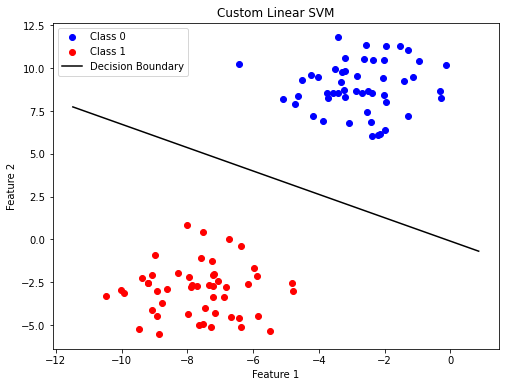

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Generate 2-class dataset
# ----------------------------
def generate_blobs(n_samples=100, centers=2, cluster_std=1.5, random_state=42):
    np.random.seed(random_state)
    X = []
    y = []
    for i in range(centers):
        center = np.random.uniform(-10, 10, 2)
        points = center + np.random.randn(n_samples // centers, 2) * cluster_std
        X.append(points)
        y += [i] * (n_samples // centers)
    X = np.vstack(X)
    y = np.array(y)
    return X, y

# ----------------------------
# Linear SVM class
# ----------------------------
class LinearSVM:
    def __init__(self, lr=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Convert labels to -1 and 1
        y_ = np.where(y == 0, -1, 1)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weights) + self.bias) >= 1
                if condition:
                    self.weights -= self.lr * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.lr * (2 * self.lambda_param * self.weights - np.dot(x_i, y_[idx]))
                    self.bias -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.weights) + self.bias
        return np.where(approx >= 0, 1, 0)

# ----------------------------
# Train and visualize
# ----------------------------
# Generate data
X_svm, y_svm = generate_blobs(n_samples=100, centers=2, cluster_std=1.5)

# Train SVM
svm = LinearSVM(lr=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X_svm, y_svm)
y_pred_svm = svm.predict(X_svm)

# Plot data points
plt.figure(figsize=(8,6))
plt.scatter(X_svm[y_svm==0][:,0], X_svm[y_svm==0][:,1], color='blue', label='Class 0')
plt.scatter(X_svm[y_svm==1][:,0], X_svm[y_svm==1][:,1], color='red', label='Class 1')

# Plot decision boundary
x0_ = np.linspace(X_svm[:,0].min()-1, X_svm[:,0].max()+1, 50)
x1_ = -(svm.weights[0]*x0_ + svm.bias)/svm.weights[1]
plt.plot(x0_, x1_, color='black', label='Decision Boundary')

plt.title("Custom Linear SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
